In [6]:
import numpy as np

# Hyperparams
inside_cost = 2.5
outside_cost = -1.5
tgt = np.array([2, 2])
radius = 5
safe_x = np.sqrt(radius**2/2)
safe_y = np.sqrt(radius**2/2)

xs = np.arange(10, -11, -1)
ys = np.arange(10, 0, -1)
ys = np.ones_like(xs)*tgt[1]
x = np.c_[xs, ys]
safe = np.c_[safe_x, safe_y]

def safe_distance_cost(x, tgt, inside_cost=1.0, outside_cost=0):
    diff = x - tgt
    diff_abs = abs(diff)
    diff_norm = np.linalg.norm(diff_abs, axis=1, keepdims=True)
    safe_distance = np.linalg.norm(safe, axis=1, keepdims=True)
    distance = diff_norm - safe_distance
    distance_abs = abs(distance)

    violation = distance < 0

    cost = (violation*inside_cost + ~violation*outside_cost)*distance_abs

#     gradient = (violation*inside_cost + ~violation*outside_cost)*distance*diff/(distance_abs*diff_norm+1e-8)
    gradient = (violation*inside_cost + ~violation*outside_cost)\
                *distance/(distance_abs+1e-8)*diff/(diff_norm+1e-8)

#     print('x\n---\n', x)
#     print('')
#     print('tgt\n---\n', tgt)
#     print('')
#     print('diff\n---\n', diff)
#     print('')
#     print('distance\n---\n', distance)
#     print('')
#     print('safe_distance\n---\n', safe_distance)
#     print('')
#     print('violation\n---\n', violation)
    
    return cost, gradient

In [8]:
cost, gradient = safe_distance_cost(x, tgt, inside_cost=inside_cost, outside_cost=outside_cost)
# cost, gradient = cost_function(np.array([1,2]).reshape(1,2), np.array([2,2]).reshape(1,2))

print('cost\n---\n', cost)
print('gradient\n---\n', gradient)

cost
---
 [[ -4.5]
 [ -3. ]
 [ -1.5]
 [ -0. ]
 [  2.5]
 [  5. ]
 [  7.5]
 [ 10. ]
 [ 12.5]
 [ 10. ]
 [  7.5]
 [  5. ]
 [  2.5]
 [ -0. ]
 [ -1.5]
 [ -3. ]
 [ -4.5]
 [ -6. ]
 [ -7.5]
 [ -9. ]
 [-10.5]]
gradient
---
 [[-1.49999999 -0.        ]
 [-1.49999999 -0.        ]
 [-1.49999998 -0.        ]
 [-0.         -0.        ]
 [-2.49999997 -0.        ]
 [-2.49999998 -0.        ]
 [-2.49999998 -0.        ]
 [-2.49999997 -0.        ]
 [-0.         -0.        ]
 [ 2.49999997 -0.        ]
 [ 2.49999998 -0.        ]
 [ 2.49999998 -0.        ]
 [ 2.49999997 -0.        ]
 [ 0.         -0.        ]
 [ 1.49999998 -0.        ]
 [ 1.49999999 -0.        ]
 [ 1.49999999 -0.        ]
 [ 1.49999999 -0.        ]
 [ 1.5        -0.        ]
 [ 1.5        -0.        ]
 [ 1.5        -0.        ]]


-10.0 -9.2


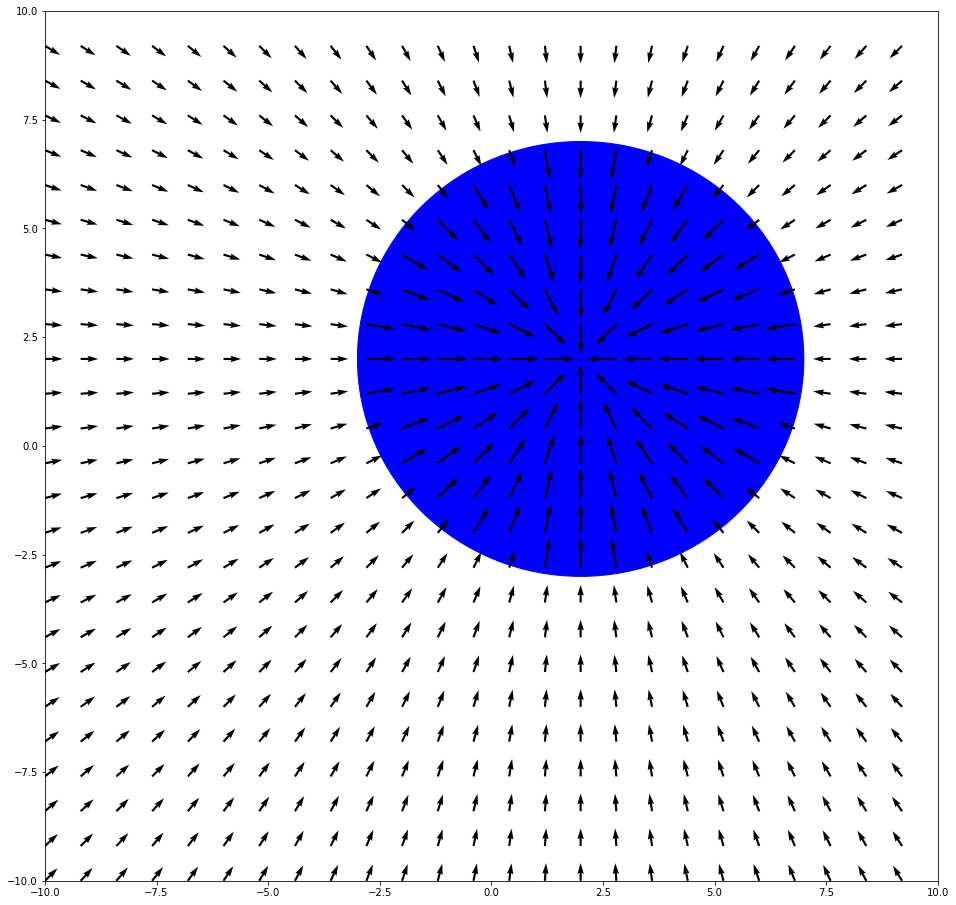

In [13]:
import matplotlib.pyplot as plt
import matplotlib

x_lims = [-10, 10]
y_lims = [-10, 10]
step = 0.8

xs = np.arange(x_lims[0], x_lims[1], step)
ys = np.arange(y_lims[0], y_lims[1], step)

X, Y = np.meshgrid(xs, ys)

Xgrad = np.zeros_like(X)
Ygrad = np.zeros_like(Y)

all_xs, all_ys = np.shape(Xgrad)

for ii in range(all_ys):
    _, grads = safe_distance_cost(np.c_[X[:,ii], Y[:,ii]], tgt,
                                  inside_cost=inside_cost, outside_cost=outside_cost)
    Xgrad[:, ii] = grads[:,0]
    Ygrad[:, ii] = grads[:,1]
#     print(X[0,ii], Y[0,ii])
#     print(Xgrad[0,ii], Ygrad[0,ii])
#     print('--')


print(X[0,0], X[0,1])

fig, ax=plt.subplots(figsize=(16, 16))
circle = plt.Circle(tgt, radius, color='blue')
ax.add_artist(circle)

Q = plt.quiver(X, Y, Xgrad, Ygrad,units='inches',zorder=10)#, units='width')
# qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

plt.show()



200
200


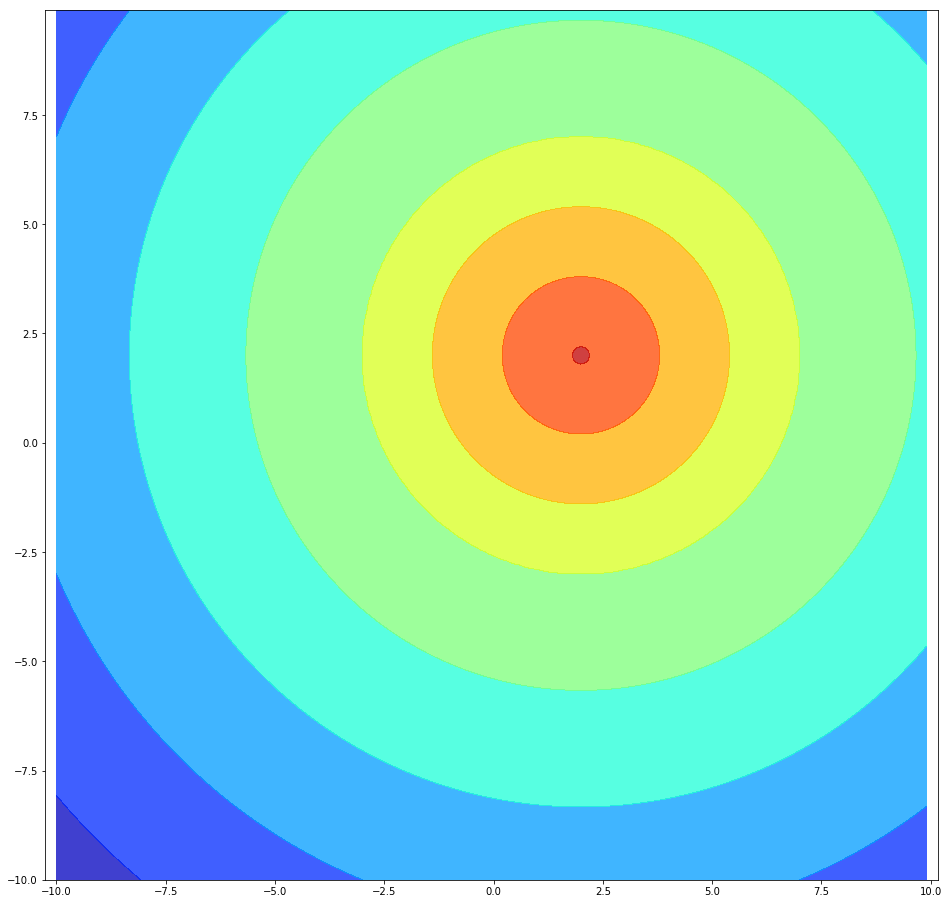

In [19]:
import matplotlib.pyplot as plt
import matplotlib

x_lims = [-10, 10]
y_lims = [-10, 10]
step = 0.1

xs = np.arange(x_lims[0], x_lims[1], step)
ys = np.arange(y_lims[0], y_lims[1], step)

X, Y = np.meshgrid(xs, ys)

costs = np.zeros_like(X)

all_xs, all_ys = costs.shape

print(all_ys)
print(all_xs)
for ii in range(all_ys):
    costs[:,ii] = safe_distance_cost(np.c_[X[:,ii], Y[:,ii]], tgt,
                                     inside_cost=inside_cost,
                                     outside_cost=outside_cost)[0].flatten()

fig, ax=plt.subplots(figsize=(16, 16))
# ax.imshow(costs, cmap='hot', interpolation='nearest',
#           extent=(x_lims[0], x_lims[1], y_lims[0], y_lims[1]))
ax.contourf(X,Y,costs,8,alpha=0.75,cmap='jet')
plt.axis('equal')
plt.show()